# Solving Rational Expectations Models

## Baby Example: Nonstochastic RBC Model

$$\max_{C_t,K_{t+1}} E_0 \sum_{t=0}^\infty \beta^t \frac{C_t^{1-\sigma}}{1-\sigma}$$

subject to:

$$ C_t + K_{t+1} - (1-\delta)K_t = K_t^\alpha  $$

$$ K_0 \text{ given and} >0$$

# Log-linearization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from numba import jit

#### Solve the baby Nonstochastic RBC model using a loglinear approximation around the steady state. 



First, I want to illustrate the solution of the baby-RBC, followed by the linearization around the steady-state, to make sense of the code, developed afterwards.

Generally, the maximization problem at hand is the following:

$$\max_{C_t,K_{t+1}} E_0 \sum_{t=0}^\infty \beta^t \frac{C_t^{1-\sigma}}{1-\sigma}$$

subject to:

$$ C_t + K_{t+1} - (1-\delta)K_t = K_t^\alpha  $$

$$ K_0 \text{ given and} >0$$

With the Lagrangian being the following:

$$L = E_0 \sum_{t=0}^{\infty} \beta^t \frac{C_t^{1-\sigma}}{1-\sigma} - \lambda_t (C_t + K_{t+1} - (1-\delta)K_t - K_t^\alpha) $$

The first order conditions with respect to $C_t$, $C_{t+1}$, and $K_{t+1}$ are the following (we drop the expectation sign here fore convenience):

\begin{align*}
&\frac{\partial L}{\partial C_t} = 0 \quad \Rightarrow \quad &\beta^tC_t^{-\sigma} - \lambda_t = 0 \\
&\frac{\partial L}{\partial C_{t+1}} = 0 \quad \Rightarrow \quad &\beta^{t+1}C_{t+1}^{-\sigma} - \lambda_{t+1} = 0 \\
&\frac{\partial L}{\partial K_{t+1}} = 0 \quad \Rightarrow \quad &-\lambda_t + \lambda_{t+1} ((1-\delta) + \alpha K_{t+1}^{\alpha-1}) = 0\\
&& \lambda_t = \lambda_{t+1} ((1-\delta) + \alpha K_{t+1}^{\alpha-1})
\end{align*}

Joining the three conditions we receive the Euler equation:

\begin{align*}
\beta^t C_t^{-\sigma} &= \beta^{t+1} C_{t+1}^{-\sigma} ((1-\delta) + \alpha K_{t+1}^{\alpha-1}) \\
C_t^{-\sigma} &= \beta C_{t+1}^{-\sigma} ((1-\delta) + \alpha K_{t+1}^{\alpha-1})
\end{align*}

#### Solve for the steady state

We use this condition now to calculate the steady-state values of consumption, capital and output. We start with the Euler equation and assume that $C_t = C_{t+1} = C^*$:

\begin{align*}
{C^*}^{-\sigma} &= \beta {C^*}^{-\sigma} ((1-\delta) + \alpha {K^*}^{\alpha-1}) \\
\frac{1}{\beta} &= ((1-\delta) + \alpha {K^*}^{\alpha-1})
\end{align*}

We will use the last condition later in the log-linearization, we however can proceed from here to isolate the steady-state capital value:

\begin{align*}
\frac{1}{\beta} - (1-\delta) &= \alpha {K^*}^{\alpha-1} \\
{K^*}^{\alpha-1} &= \frac{\frac{1}{\beta} - (1-\delta)}{\alpha} \\
{K^*}^{\alpha-1} &= \frac{1 - \beta(1-\delta)}{\alpha\beta} \\
{K^*} &= (\frac{1 - \beta(1-\delta)}{\alpha\beta})^{\frac{1}{\alpha-1}} \\
{K^*} &= (\frac{\alpha\beta}{1 - \beta(1-\delta)})^{\frac{1}{1-\alpha}}
\end{align*}

With the steady-state capital value we can isolate the steady-state output:

\begin{align*}
Y^* &= {K^*}^{\alpha} \\
&= (\frac{\alpha\beta}{1 - \beta(1-\delta)})^{\frac{\alpha}{1-\alpha}}
\end{align*}

Finally, using the aggregate budget constraint in the steady-state, assuming $K_t = K_{t+1} = K^*$:

\begin{align*}
Y^* &= C^* + K^* - (1-\delta)K^* \\
Y^* &= C^* + \delta K^* \\
C^* &= Y^* - \delta K^* \\
&= (\frac{\alpha\beta}{1 - \beta(1-\delta)})^{\frac{\alpha}{1-\alpha}} - \delta (\frac{\alpha\beta}{1 - \beta(1-\delta)})^{\frac{1}{1-\alpha}}
\end{align*}

#### Loglinearize the first order condition around the steady state

With the steady-state values for the variables, we now can analyze the dynamics of the system. We therefore start by log-linearizing the  the Euler equation around the steady-state:


\begin{align*}
-\sigma lnC_t &= ln \beta - \sigma ln C_{t+1} + ln((1-\delta) + \alpha K_{t+1}^{\alpha-1}) \\
-\sigma lnC_t &\approx -\sigma lnC^* -\sigma \underbrace{\frac{C_t - C^*}{C^*}}_{= \tilde{C_t}} \\
&\approx -\sigma lnC^* -\sigma \tilde{C_t} \\
ln \beta - \sigma ln C_{t+1} + ln((1-\delta) + \alpha K_{t+1}^{\alpha-1}) &\approx ln \beta - \sigma ln C^* + ln((1-\delta) + \alpha {K^*}^{\alpha-1}) - \sigma \frac{C_{t+1} - C^*}{C^*} + \frac{1}{(1-\delta) + \alpha {K^*}^{\alpha-1}} \alpha (\alpha-1) {K^*}^{\alpha-2} (K_{t+1} - K^*)
\end{align*}


Now using the condition, we isolated earlier $\frac{1}{\beta} = ((1-\delta) + \alpha {K^*}^{\alpha-1})$, and the notation $\tilde{X_t} = \frac{X_t - X^*}{X^*}$:


\begin{align*}
ln \beta - \sigma ln C_{t+1} + ln((1-\delta) + \alpha K_t^{\alpha-1}) &\approx ln \beta - \sigma ln C^* + ln((1-\delta) + \alpha {K^*}^{\alpha-1}) - \sigma \tilde{C}_{t+1} + \beta \alpha (\alpha-1) {K^*}^{\alpha-1} \tilde{K}_{t+1}
\end{align*}


Joining the two equations, and realizing that $-\sigma lnC^* = ln \beta - \sigma ln C^* + ln((1-\delta) + \alpha {K^*}^{\alpha-1})$:


\begin{align*}
-\sigma lnC^* -\sigma \tilde{C_t} &= ln \beta - \sigma ln C^* + ln((1-\delta) + \alpha {K^*}^{\alpha-1}) - \sigma \tilde{C}_{t+1} + \beta \alpha (\alpha-1) {K^*}^{\alpha-1} \tilde{K}_{t+1} \\
-\sigma \tilde{C_t} &= - \sigma \tilde{C}_{t+1} + \beta \alpha (\alpha-1) {K^*}^{\alpha-1} \tilde{K}_{t+1} \\
\tilde{C_t} &= \tilde{C}_{t+1} -  \frac{\alpha (\alpha-1)\beta}{\sigma} {K^*}^{\alpha-1} \tilde{K}_{t+1}
\end{align*}

The last equation, we can rewrite into: $$\tilde{C_t} - \tilde{C}_{t+1} + \frac{\alpha (\alpha-1)\beta}{\sigma}{K^*}^{\alpha-1} \tilde{K}_{t+1} = 0$$ In the next steps we want to find linearized expressions for $\tilde{C_t}$ and $\tilde{C}_{t+1}$. To receive these expressions we log-linearize the budget constraint:

\begin{align*}
K_t^{\alpha} &= C_t + K_{t+1} - (1-\delta) K_t \\
\alpha ln K_t &= ln(C_t + K_{t+1} - (1-\delta) K_t)
\end{align*}

The left-hand-side simplifies to:

\begin{align*}
\alpha ln K_t &\approx \alpha K^* + \alpha \frac{K_t -  K^*}{K^*} \\
&\approx \alpha K^* + \alpha\tilde{K_t}
\end{align*}

And the right hand side, using the fact that $Y^* = C^* + K^* - (1-\delta) K^*$:

\begin{align*}
ln(C_t + K_{t+1} - (1-\delta) K_t) &\approx ln(C^* + K^* - (1-\delta) K^*) + \frac{1}{C^* + K^* - (1-\delta) K^*}(C_t - C^*) + \frac{1}{C^* + K^* - (1-\delta) K^*}(K_{t+1} - K^*) - \frac{(1-\delta)}{C^* + K^* - (1-\delta) K^*}(K_t-K^*) \\
&\approx ln(C^* + K^* - (1-\delta) K^*) + \frac{1}{Y^*}(C_t - C^*) + \frac{1}{Y^*}(K_{t+1} - K^*) - \frac{(1-\delta)}{Y^*}(K_t-K^*) \\
&\approx ln(C^* + K^* - (1-\delta) K^*) + \frac{C^*}{Y^*}\frac{C_t - C^*}{C^*} + \frac{K^*}{Y^*}\frac{K_{t+1} - K^*}{K^*} - (1-\delta)\frac{K^*}{Y^*}\frac{K_t-K^*}{K^*} \\
&\approx ln(C^* + K^* - (1-\delta) K^*) + \frac{C^*}{Y^*} \tilde{C_t} + \frac{K^*}{Y^*}\tilde{K}_{t+1} - (1-\delta)\frac{K^*}{Y^*}\tilde{K_t}
\end{align*}

Joining both sides and canceling the steady-state $\alpha K^* = Y^* = ln(C^* + K^* - (1-\delta) K^*)$, we can isolate $\tilde{C_t}$:

\begin{align*}
\alpha K^* + \alpha \tilde{K_t} &= ln(C^* + K^* - (1-\delta) K^*) + \frac{C^*}{Y^*} \tilde{C_t} + \frac{K^*}{Y^*}\tilde{K}_{t+1} - (1-\delta)\frac{K^*}{Y^*}\tilde{K_t} \\
\alpha \tilde{K_t} &= \frac{C^*}{Y^*} \tilde{C_t} + \frac{K^*}{Y^*}\tilde{K}_{t+1} - (1-\delta)\frac{K^*}{Y^*}\tilde{K_t} \\
\frac{C^*}{Y^*} \tilde{C_t} &= \alpha \tilde{K_t} - \frac{K^*}{Y^*}\tilde{K}_{t+1} + (1-\delta)\frac{K^*}{Y^*}\tilde{K_t} \\
\tilde{C_t} &= \alpha \frac{Y^*}{C^*} \tilde{K_t} - \frac{K^*}{C^*}\tilde{K}_{t+1} + (1-\delta)\frac{K^*}{C^*}\tilde{K_t} \\
\tilde{C_t} &= (\alpha \frac{Y^*}{C^*} + (1-\delta)\frac{K^*}{C^*}) \tilde{K_t} - \frac{K^*}{C^*}\tilde{K}_{t+1}
\end{align*}

We can forward the equation to get an expression for $\tilde{C}_{t+2}$:

\begin{align*}
\tilde{C_t} &= (\alpha \frac{Y^*}{C^*} + (1-\delta)\frac{K^*}{C^*}) \tilde{K_t} - \frac{K^*}{C^*}\tilde{K}_{t+1} \\
\tilde{C}_{t+1} &= (\alpha \frac{Y^*}{C^*} + (1-\delta)\frac{K^*}{C^*}) \tilde{K}_{t+1} - \frac{K^*}{C^*}\tilde{K}_{t+2}
\end{align*}

We can use these expressions now and suplement into the log-linearized Euler equation $\tilde{C_t} - \tilde{C}_{t+1} + \frac{\alpha (\alpha-1)\beta}{\sigma}{K^*}^{\alpha-1} \tilde{K}_{t+1} = 0$:

\begin{align*}
(\alpha \frac{Y^*}{C^*} + (1-\delta)\frac{K^*}{C^*}) \tilde{K_t} - \frac{K^*}{C^*}\tilde{K}_{t+1} - (\alpha \frac{Y^*}{C^*} + (1-\delta)\frac{K^*}{C^*}) \tilde{K}_{t+1} + \frac{K^*}{C^*}\tilde{K}_{t+2} + \frac{\alpha (\alpha-1)\beta}{\sigma}{K^*}^{\alpha-1} \tilde{K}_{t+1} &= 0 \\
\underbrace{\big(\alpha \frac{Y^*}{C^*} + (1-\delta)\frac{K^*}{C^*}\big)}_{= A} \tilde{K_t} - \underbrace{\big(\frac{K^*}{C^*} + \alpha \frac{Y^*}{C^*} + (1-\delta)\frac{K^*}{C^*} - \frac{\alpha (\alpha-1)\beta}{\sigma}{K^*}^{\alpha-1}\big)}_{= B} \tilde{K}_{t+1} + \frac{K^*}{C^*}\tilde{K}_{t+2} &= 0 \\
A \tilde{K}_t - B \tilde{K}_{t+1} + \frac{K^*}{C^*}\tilde{K}_{t+2} = 0 
\end{align*}

#### Use the undetermined coefficients approach

We now guess a linear policy function for capital in the log-linear-form: $\tilde{K}_{t+1} = a_0 + a_1 \tilde{K}_t$. We use the rule to supplement for the future values of capital:

\begin{align*}
A \tilde{K}_t - B \big( a_0 + a_1 \tilde{K}_t \big) + \frac{K^*}{C^*}\big(  a_0 + a_1 \tilde{K}_{t+1} \big) &= 0 \\
A \tilde{K}_t - B \big( a_0 + a_1 \tilde{K}_t \big) + \frac{K^*}{C^*}\big(  a_0 + a_1 \big( a_0 + a_1 \tilde{K}_t \big) \big) &= 0 \\
A \tilde{K}_t - B a_0 - B a_1 \tilde{K}_t + \frac{K^*}{C^*}  a_0 + \frac{K^*}{C^*} a_1 a_0 + \frac{K^*}{C^*}a_1^2 \tilde{K}_t &= 0
\end{align*}

In the steady-state, $a_0 = 0$, because otherwise, the unconditional mean of the difference equation would not be zero (indicating that in the steady-state, capital would not be at the steady-state, which is paradoxical). Simplifying the equation above:

\begin{align*}
A \tilde{K}_t - B a_1 \tilde{K}_t + \frac{K^*}{C^*}a_1^2 \tilde{K}_t &= 0 \\
A - B a_1 + \frac{K^*}{C^*}a_1^2 &= 0
\end{align*}

The last equation has the two solutions: $$a_{1/2} = \frac{B \pm \sqrt{B^2 - 4\frac{K^*}{C^*}A}}{2\frac{K^*}{C^*}}$$ from which we choose the stable solution. Next, we implement this analytics into the class babyrbc for python

#### Given $K_0 = 0.1*K^{ss}$, $\delta = 0.05$, $\alpha = 0.3$, $\beta= 0.99$ and $\sigma = 1.5$, simulate the model for 20 periods.

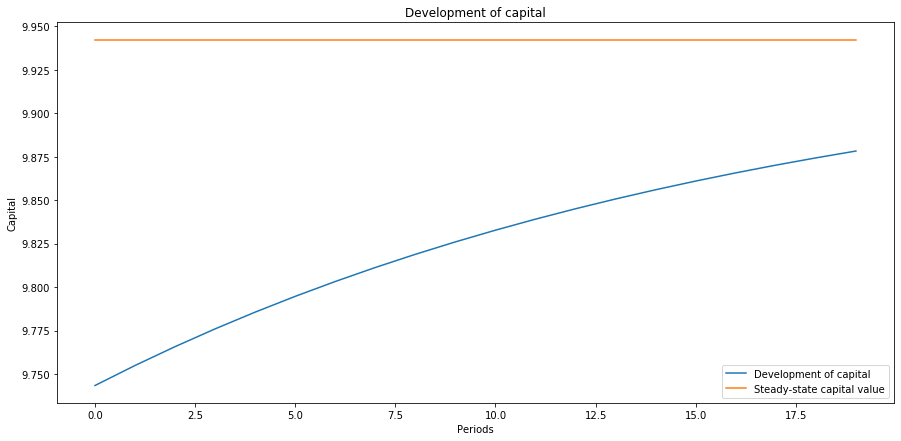

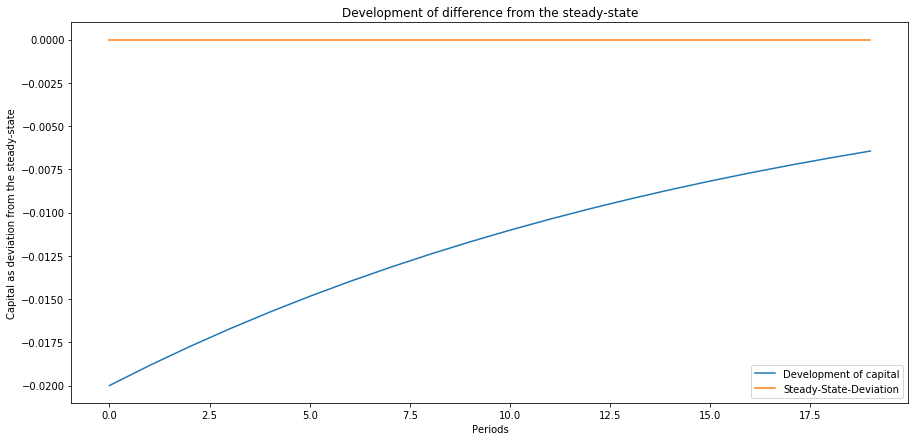

In [2]:
import numpy as np

class babyrbc():
        
    def __init__(self, alpha = 0.3, beta = 0.99, delta = 0.05, sigma = 1.5):
        '''Setting up the values for the class
        
        Input:
        
        delta =             Value for depreciation, standard is 5%
        alpha =             Value for capital income share, standard is 30%
        beta  =             Discount factor of future utility, standard value is 0.99
        sigma =             Utility specification factor, standard is 1.5
        
        
        Output:
        None, this function just sets up values for later use
        '''
                
        self.d = delta
        self.a = alpha
        self.b = beta
        self.s = sigma        
        
        self.kss = ((self.a*self.b)/(1-self.b*(1-self.d)))**(1/(1-self.a))      # Steady-state value of capital
        self.yss = self.kss**(self.a)                                          # Steady-state value of output
        self.css = self.yss - self.d*self.kss                                 # Steady-state value of consumption
        
    def irf(self, k0, n, plot = True, capital = False):
        '''Impulse response function based on initial value for capital
        
        Input:
        k0      =                Initial value for capital, from which the simulation starts
        n       =                Number of periods for the simulation
        plot    =                Boolean for plotting the irf of capital from the steady state, standard value is True
        capital =                Boolean for providing the results in levels or deviations of the steady-state, standard is in deviations   
        
        Output:
        temp    =                Root of the characteristic polynomial for the policy function
        irf     =                Numpy array with time-series values for the irf
        plot    =                Provides a time-series plot of the evoluation of capital as deviation from the steady-state
        '''
        
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        
        # Setting up the matrices according to the analytical solution developed above:        
        A = self.a*self.yss/self.css+(1-self.d)*self.kss/self.css
        B = -(self.kss/self.css+self.a*self.yss/self.css+(1-self.d)*self.kss/self.css-(self.a*(self.a-1)*self.b)/self.s*self.kss**(self.a-1))
        C = self.kss/self.css
        # Naming of the matrices here is a little bit confusing for the abc formular
        # Here a = C, b = B, and c = A
        
        
        # Solution of the root finding:
        a1 = (-B + (B**2 - 4*C*A)**(1/2))/(2*C)
        a2 = (-B - (B**2 - 4*C*A)**(1/2))/(2*C)
        
        # Checking for the stable root:
        if abs(a1) >= 1:
            temp = a2
        else:
            temp = a1
              
        # Transforming the initial k0 value into difference from it's steady-state-value
        diff = k0/self.kss - 1
        irf = np.zeros(n)                                     # Setting up the irf matrix
        irf[0] = diff                                         # Setting up the first value of the irf
        
        # Based on the initial value of the deviation of capital from the steady-state, compute the rest of irf
        for i in range(1,n):
            irf[i] = temp*irf[i-1]                            # Using of policy function to compute irfs
        
        if capital == True:                                   # For output in levels is desired
            irf = irf*self.kss + self.kss                     # Transform irf into level
        
        
        if plot == True:                                      # If plot as output is required, plot it
            fig = plt.figure(figsize=(15,7))
            plt.plot(range(n), irf, label = "Development of capital")
            plt.xlabel("Periods")
                        
            if capital == True:
                plt.ylabel("Capital")
                cap = np.zeros(n)
                cap[:] = self.kss
                plt.plot(range(n), cap, label = "Steady-state capital value")
                plt.title("Development of capital")
                plt.legend()
            
            else:
                plt.plot(range(n), np.zeros(n), label = "Steady-State-Deviation")
                plt.ylabel("Capital as deviation from the steady-state")
                plt.title("Development of difference from the steady-state")
                plt.legend()
            plt.show()
        
        return temp, irf, a1, a2
    

    
# Testing area
rbc1 = babyrbc()
k0 = 0.98*rbc1.kss

root1, irf1, roots1, roots2 = rbc1.irf(k0, 20, capital = True)
root1, irf1, roots1, roots2 = rbc1.irf(k0, 20)

#### Simulate the model instead with $\delta = 1$, $\alpha = 0.3$, $\beta= 0.99$ and $\sigma = 1$ for 20 periods and compare it with the simulation coming from the exact solution: $g ( K_t ) = \alpha \beta K_t^\alpha$. Also, compare the policy functions of the exact solution with the loglinear approximation in a plot.


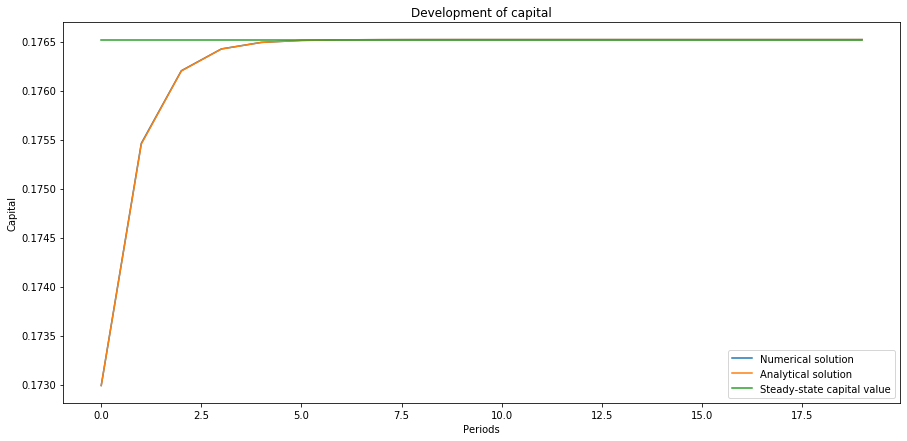

In [3]:
# Setting up the function for the exact policy function:
def irf(alpha, beta, k0, n):
    g = np.zeros(n)
    g[0] = k0
    for i in range(1,n):
        g[i] = alpha*beta*g[i-1]**alpha
        
    return g


# Initializing the values for the exact policy function
a = 0.3                      # Alpha
b = 0.99                     # Beta
s = 1                        # sigma
d = 1                        # Delta
n = 20                       # Number of simulations

kss = (a*b)**(1/(1-a))       # Steady-state for capital
yss = kss**a                 # Steady-state for output
css = yss - d*kss            # Steady-state for consumption


rbc2 = babyrbc(alpha = a, beta = b, delta = d, sigma = s)
root, irf2, root1, root2 = rbc2.irf(0.98*kss, 20, capital = True, plot = False)


#Preperation for plotting, calling the functions for numerical approximation and analytical solution
impulse = irf(a, b, 0.98*kss, n)               # Exact transition for capital

# Plotting both trajectories in the same graph
fig = plt.figure(figsize=(15,7))
plt.plot(range(n), irf2, label = "Numerical solution")
plt.plot(range(n), impulse, label = "Analytical solution")
plt.xlabel("Periods")
plt.title("Development of capital")
plt.ylabel("Capital")
cap = np.zeros(n)
cap[:] = kss
plt.plot(range(n), cap, label = "Steady-state capital value")
plt.legend()
plt.show()

# Value Function Iteration

#### Value Function Iteration in Infinite Time 

We begin with the Bellman operator:

$$\Gamma(V(x)) = \max_{a \in A(x)} u(x, a) + \beta E V (x^\prime)  $$

- Specify the initial guess $V_0$ and compute:

$$V_1(x) = \max_{a \in A(x)} u(x, a) + \beta E V_0 (x^\prime)  $$


- Then iterate until convergence:

$$V_T(x) = \max_{a \in A(x)} u(x, a) + \beta E V_{T=1} (x^\prime)  $$

until

$$ || V_T(x) - V_{T-1}(x)|| < \epsilon $$

Since (FE) is a “contraction mapping” this is guaranteed to converge.


### Value Function Iteration of the Example

In [4]:
# Create a grid for capital and then guess that V_0(k) = 0 for all k in K

def initialize(start, end, n, guess = 0):
    """Function initializing the capital grid and an initial guess for the value function
    
    Inputs:
    start         = start value for the capital grid
    end           = end point for the capital grid
    n             = number of grid points for the grid
    guess         = Initial guess for the value function
    
    
    Outputs:
    capital       = discretized capital grid
    value         = initial guess for the value function"""
    
    
    capital = np.linspace(start, end, n)
    value = np.ones((n,))*guess
    
    return capital, value


# Starting and end values of the capital grid
kmin = 10**(-6)
kmax = 1
knum = 500


# Testing areas
capital, value = initialize(kmin, kmax, knum)

Assume same parameters as with exact solution in exercise 1. Iterate on $V_{n+1} = \max_{k^\prime \in K}{u(k,k^\prime) + \beta V_n(k′)}$
until convergence. Notice how the choices $k^\prime$ is restricted to only take on values on the grid. Having a fine grid is important to have a good approximation!

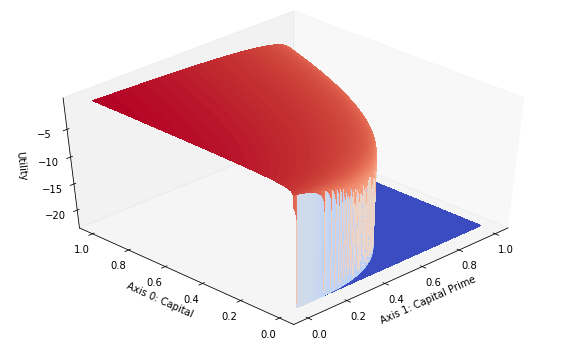

In [5]:
# Defining utility function
def utility(k, kprime, alpha = 0.3):
    """Function giving back the log-utility for a combination of capital today, and capital tomorrow
    
    Input:
    
    k                 = Capital stock employed this period in production
    kprime            = Capital stock in the next period
    alpha             = Capital income share in total income, default value is 0.3
    
    
    Output:           
    
    Utility           = returns a numpy vector with the utility for the given combinations of k and kprime
    """
    
    
    k, kprime = np.meshgrid(k, kprime)                  # Necessary for application of function
    
    c = k**alpha - kprime
    c[c < 10**(-10)] = 10**(-10)
    return np.transpose(np.log(c))

    
# Testing area
util = utility(capital, capital)
cap, cap1 = np.meshgrid(capital, capital)

# Plotting the relation of utility and capital in next period
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection = '3d')
p = ax.plot_surface(cap, cap1, util, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(45, 225)
ax.set_xlabel('Axis 1: Capital Prime')
ax.set_ylabel('Axis 0: Capital')
ax.set_zlabel('Utility')
ax.grid(False)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5
plt.show()

<ipython-input-6-500405a4ed3b>:3: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "vfi" failed type inference due to: Untyped global name 'utility': cannot determine Numba type of <class 'function'>

File "<ipython-input-6-500405a4ed3b>", line 26:
def vfi(k, v, alpha = 0.3, beta = 0.99, precision = 10**(-8)):
    <source elided>
    while abs(diff.max()) > precision:
        v1 = np.amax(utility(k, k) + beta*v, axis = 1)
        ^

  @jit
<ipython-input-6-500405a4ed3b>:3: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "vfi" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-6-500405a4ed3b>", line 25:
def vfi(k, v, alpha = 0.3, beta = 0.99, precision = 10**(-8)):
    <source elided>
    
    while abs(diff.max()) > precision:
    ^

  @jit
C:\Users\Fabio\anaconda3\lib\site-packages\numba\core\object_mode_pa


 Value function iteration took 1821 iterations and took 37.970306 seconds


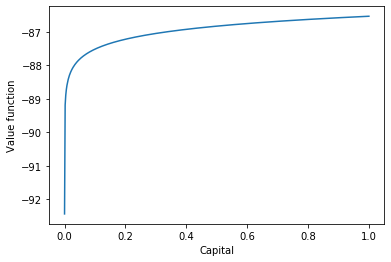

In [6]:
import time

@jit
def vfi(k, v, alpha = 0.3, beta = 0.99, precision = 10**(-8)):
    """Function which uses the algorithm for value function iteration. In the special case economy.
    
    Inputs:
    
    k            = Numpy vector of capital grid
    v            = Numpy vector of value function for given capital grid
    alpha        = Share of capital income in total income, default is 0.3
    beta         = Discount factor of future utility flows, default is 0.99
    precision    = Toleranze until which the VFI is computed
    
    
    Output:
    v1           = Converged value function
    """
    
    start = time.time()
    v1 = np.copy(v)
    count = 0
    diff = v1 - v + 1
    
    while abs(diff.max()) > precision:
        v1 = np.amax(utility(k, k) + beta*v, axis = 1)
        diff = v1 - v
        v = np.copy(v1)
        count += 1
    end = time.time()
    print("\n Value function iteration took %1.F iterations and took %F seconds" % (count, end-start))
    return v1


# Testing area
value = vfi(capital, value)

# Plotting the relation, should be concave (and it is)
fig, ax = plt.subplots()
ax.plot(capital, value)
ax.set_xlabel("Capital")
ax.set_ylabel("Value function")
plt.show()

Find the associated optimal policy function and compare it with the loglinear approximation and with the exact solution.

<ipython-input-7-35c9442b0435>:4: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "policyfunction" failed type inference due to: Untyped global name 'utility': cannot determine Numba type of <class 'function'>

File "<ipython-input-7-35c9442b0435>", line 20:
def policyfunction(v, cap, alpha = 0.3, beta = 0.99):
    <source elided>
    for k in range(len(cap)):                                     # Which k' maximizes the utility?
        loc = np.argmax(utility(cap[k], cap) + beta*v, axis = 1)
        ^

  @jit
<ipython-input-7-35c9442b0435>:4: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "policyfunction" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-7-35c9442b0435>", line 19:
def policyfunction(v, cap, alpha = 0.3, beta = 0.99):
    <source elided>
    pol = np.zeros(np.shape(cap))
    for k in rang

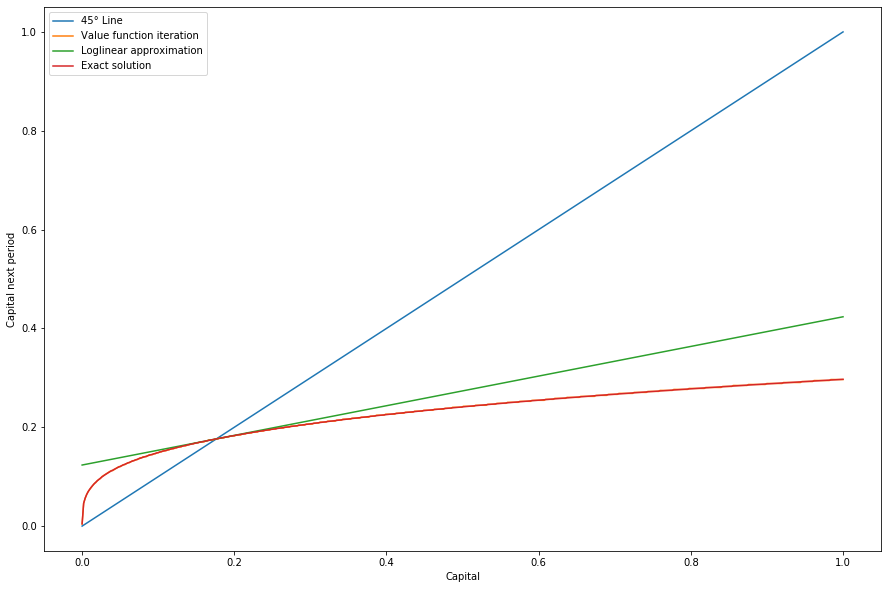

In [7]:
# d. Find the associated optimal policy function and compare it with the loglinear approximation 
# and with the exact solution.

@jit
def policyfunction(v, cap, alpha = 0.3, beta = 0.99):
    """Function to extract a policy function for given value function and capital grid
    
    Inputs:
    v                   = Optimal value function, obtained as solution of the bellman equation
    cap                 = Numpy vector for the capital grid
    
    
    Output:
    pol                 = Discretized policy function, providing kprime for given k
    """
    
    
    pol = np.zeros(np.shape(cap))
    for k in range(len(cap)):                                     # Which k' maximizes the utility?
        loc = np.argmax(utility(cap[k], cap) + beta*v, axis = 1)
        pol[k] = cap[loc]
    return pol


# Setting up the policy function for the loglinear approximation:
khat = (capital-kss)/kss                # Transforming the grid for capital into deviations from the steady state
numpol = np.copy(khat)                  # Setting up a vector for the numerical policy function

for i in range(knum):                   # Loop to generate the loglinearized policy function for the deviation from
    numpol[i] = root*khat[i]            # the steady state. Use of the root from exercise 1.

numpol = numpol*kss + kss               # Transforming the deviations from the steady state into levels


# Plotting the VFI, exact solution, and the loglinear approximation
pol = policyfunction(value, capital)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(capital, capital, label = "45° Line")
ax.plot(capital, pol, label = "Value function iteration")
ax.plot(capital, numpol, label = "Loglinear approximation")
ax.plot(capital, 0.3*0.99*capital**0.3, label = "Exact solution")
ax.set_xlabel("Capital")
ax.set_ylabel("Capital next period")
ax.legend()
plt.show()

We find that value function iteration is and the exact solution are quite close together. The loglinear approximation is rather bad at approximating the development far away of the steady state. In the next step we compare the approximation errors for both methods.

In [8]:
# Checking the difference in the policy functions for the methods:

exact = 0.3*0.99*capital**0.3
verror = np.sum(((pol - exact)/exact)**2)
logerror = np.sum(((numpol - exact)/exact)**2)

print("\n Error for Value function iteration: %F, and for loglinear approximation: %F" % (verror, logerror))


 Error for Value function iteration: 0.026474, and for loglinear approximation: 668.460889


We therefore find that the value function iteration suffers from some error, this is however small for the grid with 500 observations, we approximated. The loglinear approximation suffers strongly from its errors far away from the steady state. Finally, I want to check, whether the steady state of the policy function with value function iteration is near the actual steady state:


The root is 0.176354, and the steady state is 0.176520, which is an error of -0.094539 percent


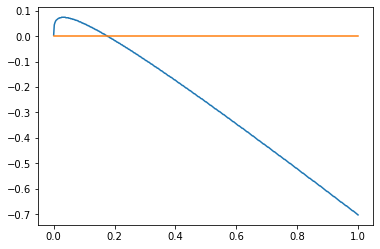

In [9]:
# To check, whether both generate the same steady state we find the root of the excess function:
def excess(pol, cap):
    ex = pol - cap
    return ex

excess = excess(pol, capital)


# Simply finding the root by looking at the grid
loc = np.where(excess == 0)
print("\nThe root is %F, and the steady state is %F, which is an error of %F percent"% (pol[loc[0][0]], kss, (pol[loc[0][0]] - kss)/kss*100))   # Seems fairly close

# Plotting this relation
fix, ax = plt.subplots()
ax.plot(capital, excess)
ax.plot(capital, np.zeros(np.shape(capital)))
plt.show()

We can therefore conclude that the VFI approximates well the policy function of the exact solution, as well as generates a precise estimate of the steady state.

# Policy function iteration

Based on the same model economy as mentioned above, we now want to apply policy function iteration to obtain the policy function. The procedure can be described as the following:

1. Start with an initial guess of the policy function for example: $c(K_t) = \frac{K_t}{2}$

2. Determine the optimal policies $c_{new}(K_t)$ for all states in the available set of states, by solving the set of first order conditions:

$$\frac{1}{c_t} - \beta ((1-\delta) + \alpha K_{t+1}^{\alpha-1}) \frac{1}{c(K_{t+1})} = 0$$

$$\frac{1}{K_t^{\alpha} - K_{t+1}} - \beta ((1-\delta) + \alpha K_{t+1}^{\alpha-1}) \frac{1}{c(K_{t+1})} = 0$$

3. Check for convergence i.e. calculate $$\max_{k_t} \Big[ \frac{c_{new}(K_t) - c(K_t)}{c(K_t)} \Big] < \epsilon$$

4. If the iteration hasn't oconverged, update the guess for the policy function and go back to step 2.

In [10]:
# Importing the necessary package for the solution of the root finding problem
import scipy.interpolate as interp

In [11]:
# Initial guess for the policy function which is simply capital divided by two
guess = capital/2

def euler(cap, guess, capital):
    """Function giving back the exact value for future capital which solves the first order condition
    
    Inputs:
    
    cap     =      value for capital for which the euler equation is evaluated
    guess   =      guess for the policy function in form of a numpy array
    capital =      matrix for capital, used in the interpolation
    
    
    Output:
    
    loc     =      value for future capital which solves the euler equation
    
    """
    
    delta = 1
    alpha = 0.3
    beta = 0.99
    
    # Interpolating over the policy function
    tck = interp.splrep(capital, guess)
    y_app_spl = lambda x: interp.splev(x, tck)
    
    # Evaluating the residual as a function of future capital
    res = lambda cap1: 1/(cap**alpha - cap1) - beta*((1-delta)+alpha*cap1**(alpha-1))/y_app_spl(cap1)
    loc = opt.fsolve(res, 0.1)
    return loc


# Testing area
delta = 1
alpha = 0.3
beta = 0.99
kss = (alpha*beta)**(1/(1-alpha))

# Extracting the optimal future capital
test1 = euler(kss, guess, capital)
print("\nThe solution of the euler equation is %f " % test1)

# Interpolating over the capital grid to be able to continuously plug in the values for capital
tck = interp.splrep(capital, guess)
y_app_spl = lambda x: interp.splev(x, tck)

# Printing the residual of the euler equation
print("\nThe residual of the euler equation is %.10f" % (1/(kss**alpha - test1) - beta*(+alpha*test1**(alpha-1))/y_app_spl(test1)))


The solution of the euler equation is 0.333734 

The residual of the euler equation is 0.0000000000


In [12]:
# Setting up the arrays
new = np.copy(capital)
iteration = 0
error = 1

In [13]:
# Policy function iteration
start = time.time()

while error > 10**(-6):
    iteration += 1
    
    # Until convergence, generate a new policy function based on the current capital stock and the euler solution
    for index, k in enumerate(capital):
        # Generate a new policy function
        new[index] = k**alpha - euler(k, guess, capital)
        
        # Manually set the policy function for the lowest level of capital to equal total savings (ensures convergence)
        new[0] = capital[0]
    
    # Calculating the error
    error = np.max((new - guess)/guess)
    
    # Updating the policy function which is employed in the next iteration round
    guess = np.copy(new)
    print(iteration, error)
    
end = time.time()

print("\nPolicy function iteration took %1.F iterations, and took %f seconds." % (iteration, end - start))

C:\Users\Fabio\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


1 40.53537479519365
2 1.1370519600892421
3 0.16264473098462937
4 0.03836256766368922
5 0.01059955648022368
6 0.0030793603041452187
7 0.0009084950769026592
8 0.00026928250573156787
9 7.992871673100251e-05
10 2.3734530731896728e-05
11 7.04877216702601e-06
12 2.09345114232932e-06
13 6.217519376859718e-07

Policy function iteration took 13 iterations, and took 2.784519 seconds.


In [14]:
policy = capital**alpha - guess

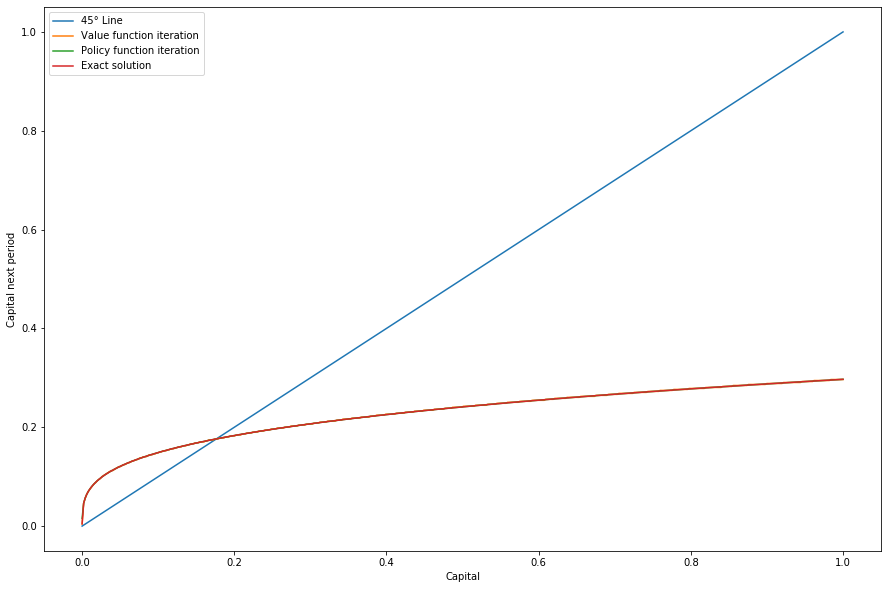

In [15]:
# Plotting the VFI, exact solution, and the policy function iteration solution
pol = policyfunction(value, capital)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(capital, capital, label = "45° Line")
ax.plot(capital, pol, label = "Value function iteration")
ax.plot(capital, policy, label = "Policy function iteration")
ax.plot(capital, 0.3*0.99*capital**0.3, label = "Exact solution")
ax.set_xlabel("Capital")
ax.set_ylabel("Capital next period")
ax.legend()
plt.show()

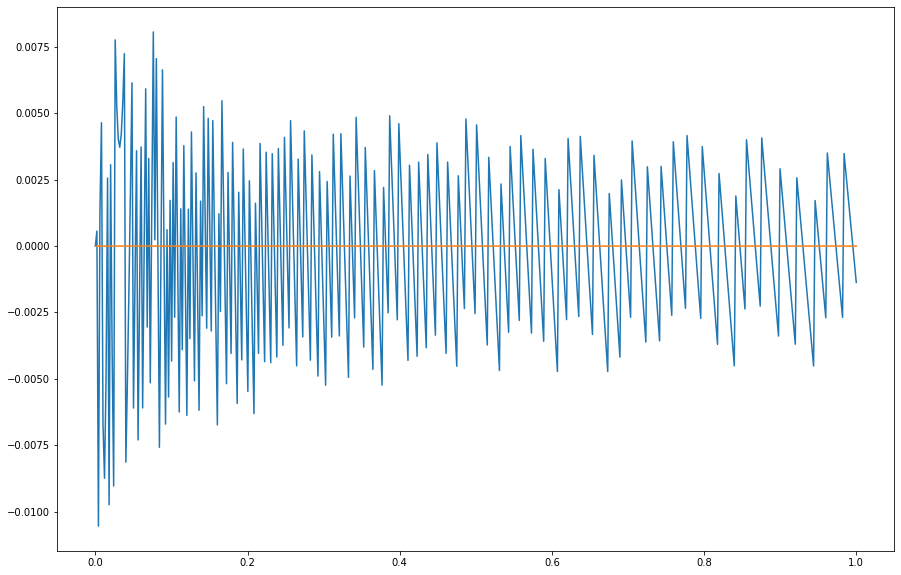

In [16]:
# Error of the approximation in relation to the exact solution:
error1 = (pol - 0.3*0.99*capital**0.3)/(0.3*0.99*capital**0.3)
error2 = (policy - 0.3*0.99*capital**0.3)/(0.3*0.99*capital**0.3)

# Setting the initial error manually to zero, because it mainly drives the error comparison
error1[0] = 0
error2[0] = 0

# Plotting the errors of the two approximations against each other
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(capital, error1, label = "Error of the Value function solution algorithm")
ax.plot(capital, error2, label = "Error of the Policy function solution algorithm")
plt.show()

In [17]:
# Printing the mean squared errors of the two approximation methods
print("\n The error of the value function approximation is %f" %(np.sum(error1**2)))
print("\n The error of the policy function approximation is %f" %(np.sum(error2**2)))


 The error of the value function approximation is 0.004478

 The error of the policy function approximation is 0.000000


As we can see, the policy function iteration provides a very exact approximation of the exact solution, whereas the value function iteration is exact, as well, however provides more error than the policy funciton iteration.